# Explore Model Embeddings

In [1]:
from pathlib import Path
import os
import warnings

%load_ext autoreload
%autoreload 2

# ignore warnings for now ...
warnings.filterwarnings('ignore')

if Path('.').absolute().parents[1].name == 'ml_drought':
    os.chdir(Path('.').absolute().parents[1])

!pwd

/Users/tommylees/github/ml_drought


In [2]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

data_dir = Path('data/')
# data_dir = Path('/Volumes/Lees_Extend/data/zip_data')
data_dir = Path('/Volumes/Lees_Extend/data/ecmwf_sowc/data/')
plot_dir = Path('/Users/tommylees/Downloads')

assert data_dir.exists()

In [3]:
import seaborn as sns
from src.utils import drop_nans_and_flatten

from src.analysis import read_train_data, read_test_data, read_pred_data

In [4]:
EXPERIMENT =      'one_month_forecast_BOKU_VCI3M_adede_only_vars'
TRUE_EXPERIMENT = 'one_month_forecast_BOKU_VCI3M_our_vars_20205006_1550'
TARGET_VAR =      'VCI3M'

In [5]:
EXPERIMENT =      'one_month_forecast_BOKU_boku_VCI_our_vars'
TRUE_EXPERIMENT = 'one_month_forecast_BOKU_boku_VCI_our_vars'
TARGET_VAR =      'boku_VCI'

# Read in the data

In [6]:
X_train, y_train = read_train_data(data_dir, experiment=EXPERIMENT)
X_test, y_test = read_test_data(data_dir, experiment=EXPERIMENT)
static_ds = xr.open_dataset(data_dir / "features/static/data.nc")

ds = xr.merge([y_train, y_test]).sortby('time').sortby('lat')
d_ = xr.merge([X_train, X_test]).sortby('time').sortby('lat')
ds = xr.merge([ds, d_])

In [7]:
print("TRAINING DATA")
display(ds)
print('\n\n')
print("TARGET DATA")
display(y_test)

TRAINING DATA


<xarray.Dataset>
Dimensions:     (lat: 45, lon: 35, time: 205)
Coordinates:
  * time        (time) datetime64[ns] 2001-12-31 2002-01-31 ... 2018-12-31
  * lon         (lon) float64 33.75 34.0 34.25 34.5 ... 41.5 41.75 42.0 42.25
  * lat         (lat) float64 -5.0 -4.75 -4.5 -4.25 -4.0 ... 5.25 5.5 5.75 6.0
Data variables:
    boku_VCI    (time, lat, lon) float64 100.0 100.0 98.82 ... 11.94 78.34 40.51
    p84.162     (time, lat, lon) float64 1.45e-05 -5.456e-05 ... nan nan
    pev         (time, lat, lon) float64 -0.005993 -0.006077 ... nan nan
    sp          (time, lat, lon) float64 8.862e+04 8.927e+04 ... nan nan
    t2m         (time, lat, lon) float64 297.5 298.4 297.4 296.2 ... nan nan nan
    tp          (time, lat, lon) float64 0.003657 0.00285 0.004386 ... nan nan
    VCI         (time, lat, lon) float64 57.69 89.55 63.82 45.12 ... nan nan nan
    precip      (time, lat, lon) float64 102.0 107.6 122.3 111.1 ... nan nan nan
    E           (time, lat, lon) float64 85.9 60.61 60




TARGET DATA


<xarray.Dataset>
Dimensions:   (lat: 45, lon: 35, time: 36)
Coordinates:
  * lon       (lon) float64 33.75 34.0 34.25 34.5 ... 41.5 41.75 42.0 42.25
  * lat       (lat) float64 6.0 5.75 5.5 5.25 5.0 ... -4.0 -4.25 -4.5 -4.75 -5.0
  * time      (time) datetime64[ns] 2016-01-31 2016-02-29 ... 2018-12-31
Data variables:
    boku_VCI  (time, lat, lon) float64 64.45 52.16 97.37 96.48 ... nan nan nan

In [8]:
from src.utils import get_ds_mask
mask = get_ds_mask(X_train.VCI)

bline_pred = read_pred_data('previous_month', data_dir, experiment=EXPERIMENT)[-1].where(~mask)
lstm_pred = read_pred_data('rnn', data_dir, experiment=EXPERIMENT)[-1].where(~mask)
ealstm_pred = read_pred_data('ealstm', data_dir, experiment=EXPERIMENT)[-1].where(~mask)

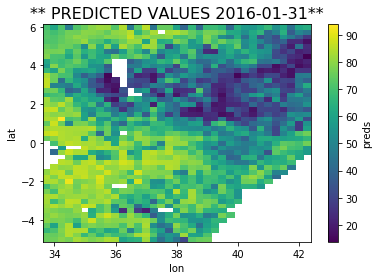

In [13]:
fig, ax = plt.subplots()
time_ix = 0
time = ealstm_pred.isel(time=time_ix).time.values
ealstm_pred.isel(time=time_ix).plot(ax=ax)
ax.set_title(f"** PREDICTED VALUES {str(time).split('T')[0]}**", size=16);

# Read in the models
Input data:
* boku_VCI    
* pev         
* t2m         
* precip      
* E           
* SMroot      
* SMsurf


\+ each variables SPATIAL MEAN (therefore 14 input variables)

In [14]:
from src.models import load_model

In [17]:
ealstm = load_model(data_dir / 'models' / EXPERIMENT / 'ealstm' / 'model.pt')
lstm = load_model(data_dir / 'models' / EXPERIMENT / 'rnn' / 'model.pt')

In [20]:
dir(ealstm)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_concatenate_data',
 '_convert_delta_to_raw_values',
 '_get_background',
 '_get_morris_explanations',
 '_get_shap_explanations',
 '_initialize_model',
 '_input_to_tuple',
 '_load_spatial_mask',
 '_make_analysis_folder',
 '_one_hot',
 'batch_size',
 'current_size',
 'data_path',
 'data_vars',
 'denormalize_y',
 'dense_features',
 'device',
 'evaluate',
 'experiment',
 'explain',
 'explainer',
 'features_per_month',
 'get_dataloader',
 'hidden_size',
 'ignore_vars',
 'include_latlons',
 'include_monthly_aggs',
 'include_pred_month',
 'include_prev_y',
 'include_yearly_aggs',
 'input_dense',
 'load',
 'model',
 'model_dir',
 'model_name',
 'models_dir',
 'normalize_y',
 'normalizing_dict',
 'num_locations',
 'pred_months',
 'predict',
 'predict_delta',
 'rnn_dropout',
 'save_model',
 'spatial_mask',
 'static',
 'static_embedding_size',
 'static_size',
 'surrounding_pixels',
 'to',
 'train',
 'yearly_agg_size']

In [70]:
ealstm.models_dir = data_dir / 'models' / EXPERIMENT
lstm.models_dir = data_dir / 'models' / EXPERIMENT

ealstm.ignore_vars = [v for v in ealstm.ignore_vars if v not in ['VCI3M', 'modis_ndvi']]
lstm.ignore_vars =[v for v in lstm.ignore_vars if v not in ['VCI3M', 'modis_ndvi']]

ealstm.features_per_month  # x.shape[-1] = the number of features in dynamic data 

14

# Interpret Model

In [72]:
ealstm.get_static_embedding

AttributeError: 'EARecurrentNetwork' object has no attribute 'get_static_embedding'

# Get Morris Gradients

In [55]:
?ealstm.get_dataloader

Signature:
ealstm.get_dataloader(
    mode: str,
    to_tensor: bool = False,
    shuffle_data: bool = False,
    **kwargs,
) -> src.models.data.DataLoader
Docstring: Return the correct dataloader for this model
File:      ~/github/ml_drought/src/models/base.py
Type:      method


In [69]:
test_arrays_loader = ealstm.get_dataloader(
                mode="train", batch_file_size=1, to_tensor=True
)
_, val = list(next(iter(test_arrays_loader)).items())[0]
var_names = val.var_names
x = val.x

AttributeError: 'tuple' object has no attribute 'items'

In [65]:
?ealstm._get_morris_explanations

Signature: ealstm._get_morris_explanations(x: src.models.data.TrainData) -> Dict[str, numpy.ndarray]
Docstring:
https://github.com/kratzert/ealstm_regional_modeling/blob/master/papercode/morris.py

Will return a train data object with the Morris gradients of the inputs
File:      ~/github/ml_drought/src/models/neural_networks/base.py
Type:      method


In [67]:
ealstm.explain(method='morris')

TypeError: __init__() got an unexpected keyword argument 'shuffle'